In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl as ql
import datetime as dt

In [2]:
# 2.6. Currency or Foreign Exchange

# 2.6.1. USD Broad Trade Weighted Index (Bloomberg Dollar Total Return, Federal Reserve Economic Data)
# 2.6.2. USD Major Currencies Trade Weighted Index (Deutsche Bank Long US Dollar Index, Federal Reserve Economic Data)

# Data Query and Range Delimiting
usdquery = ql.get(["FRED/TWEXB", "FRED/DTWEXM"], collapse="monthly")
musdall = usdquery['2006-04-01':'2016-04-30']
musdall.columns =['mbroad', 'mmajor']

In [3]:
# Monthly and Annual Returns Calculation
musdall.loc[:, 'mbroadret'] = musdall.loc[:, 'mbroad'] / musdall.loc[:, 'mbroad'].shift(1) - 1
musdall.loc[:, 'abroadret'] = musdall.loc[:, 'mbroad'] / musdall.loc[:, 'mbroad'].shift(12) - 1

musdall.loc[:, 'mmajorret'] = musdall.loc[:, 'mmajor'] / musdall.loc[:, 'mmajor'].shift(1) - 1
musdall.loc[:, 'amajorret'] = musdall.loc[:, 'mmajor'] / musdall.loc[:, 'mmajor'].shift(12) - 1

C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [4]:
# Cumulative Monthly Returns Calculation
musdall.loc[:, 'mbroadcum'] = np.cumprod(musdall.loc[:, 'mbroadret'] + 1) - 1
musdall.loc[:, 'mmajorcum'] = np.cumprod(musdall.loc[:, 'mmajorret'] + 1) - 1


C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [5]:
# Annualized Monthly Returns Calculation
musdall.loc[:, 'mbroadcuma'] = np.cumprod(musdall.loc[:, 'mbroadret'] + 1) ** (12 / len(musdall)) - 1
musdall.loc[:, 'mmajorcuma'] = np.cumprod(musdall.loc[:, 'mmajorret'] + 1) ** (12 / len(musdall)) - 1


C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 4, 30)
mbroadreta = musdall.at[lastdate, 'mbroadcuma']
mmajorreta = musdall.at[lastdate, 'mmajorcuma']


In [7]:
# Annualized Monthly Standard Deviation Calculation
mbroadstdeva = np.std(musdall.loc[:, 'mbroadret']) * np.sqrt(12)
mmajorstdeva = np.std(musdall.loc[:, 'mmajorret']) * np.sqrt(12)


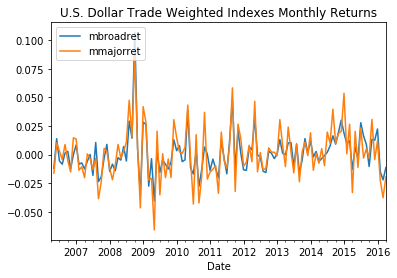

In [8]:
# 2.6.2. Currencies or Foreign Exchange Charts and Tables

# Monthly Returns Chart
musdall.plot(y=['mbroadret', 'mmajorret'])
plt.title('U.S. Dollar Trade Weighted Indexes Monthly Returns')
plt.legend(loc='upper left')
plt.show()


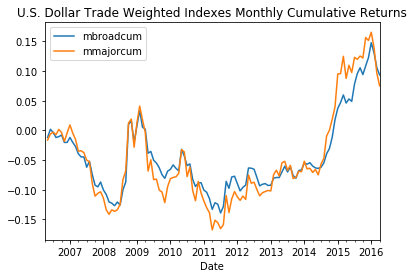

In [9]:
# Cumulative Monthly Returns Chart
musdall.plot(y=['mbroadcum', 'mmajorcum'])
plt.title('U.S. Dollar Trade Weighted Indexes Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [10]:
# Annualized Monthly Return and Standard Deviation Table
usddata = [{'0': '', '1': 'mbroadret', '2': 'mmajorret'},
        {'0': 'Annualized Return', '1': mbroadreta, '2': mmajorreta},
        {'0': 'Annualized Standard Deviation', '1': mbroadstdeva, '2': mmajorstdeva}]
usdtable = pd.DataFrame(usddata)
print("")
print(usdtable)
print("")



                               0          1           2
0                                 mbroadret   mmajorret
1              Annualized Return  0.0088996  0.00720887
2  Annualized Standard Deviation  0.0610852   0.0792639

